#  Step 1: Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the data 

In [2]:
data = pd.read_csv("carprice.csv")

# Step 3: Data Exploration and Visualization 

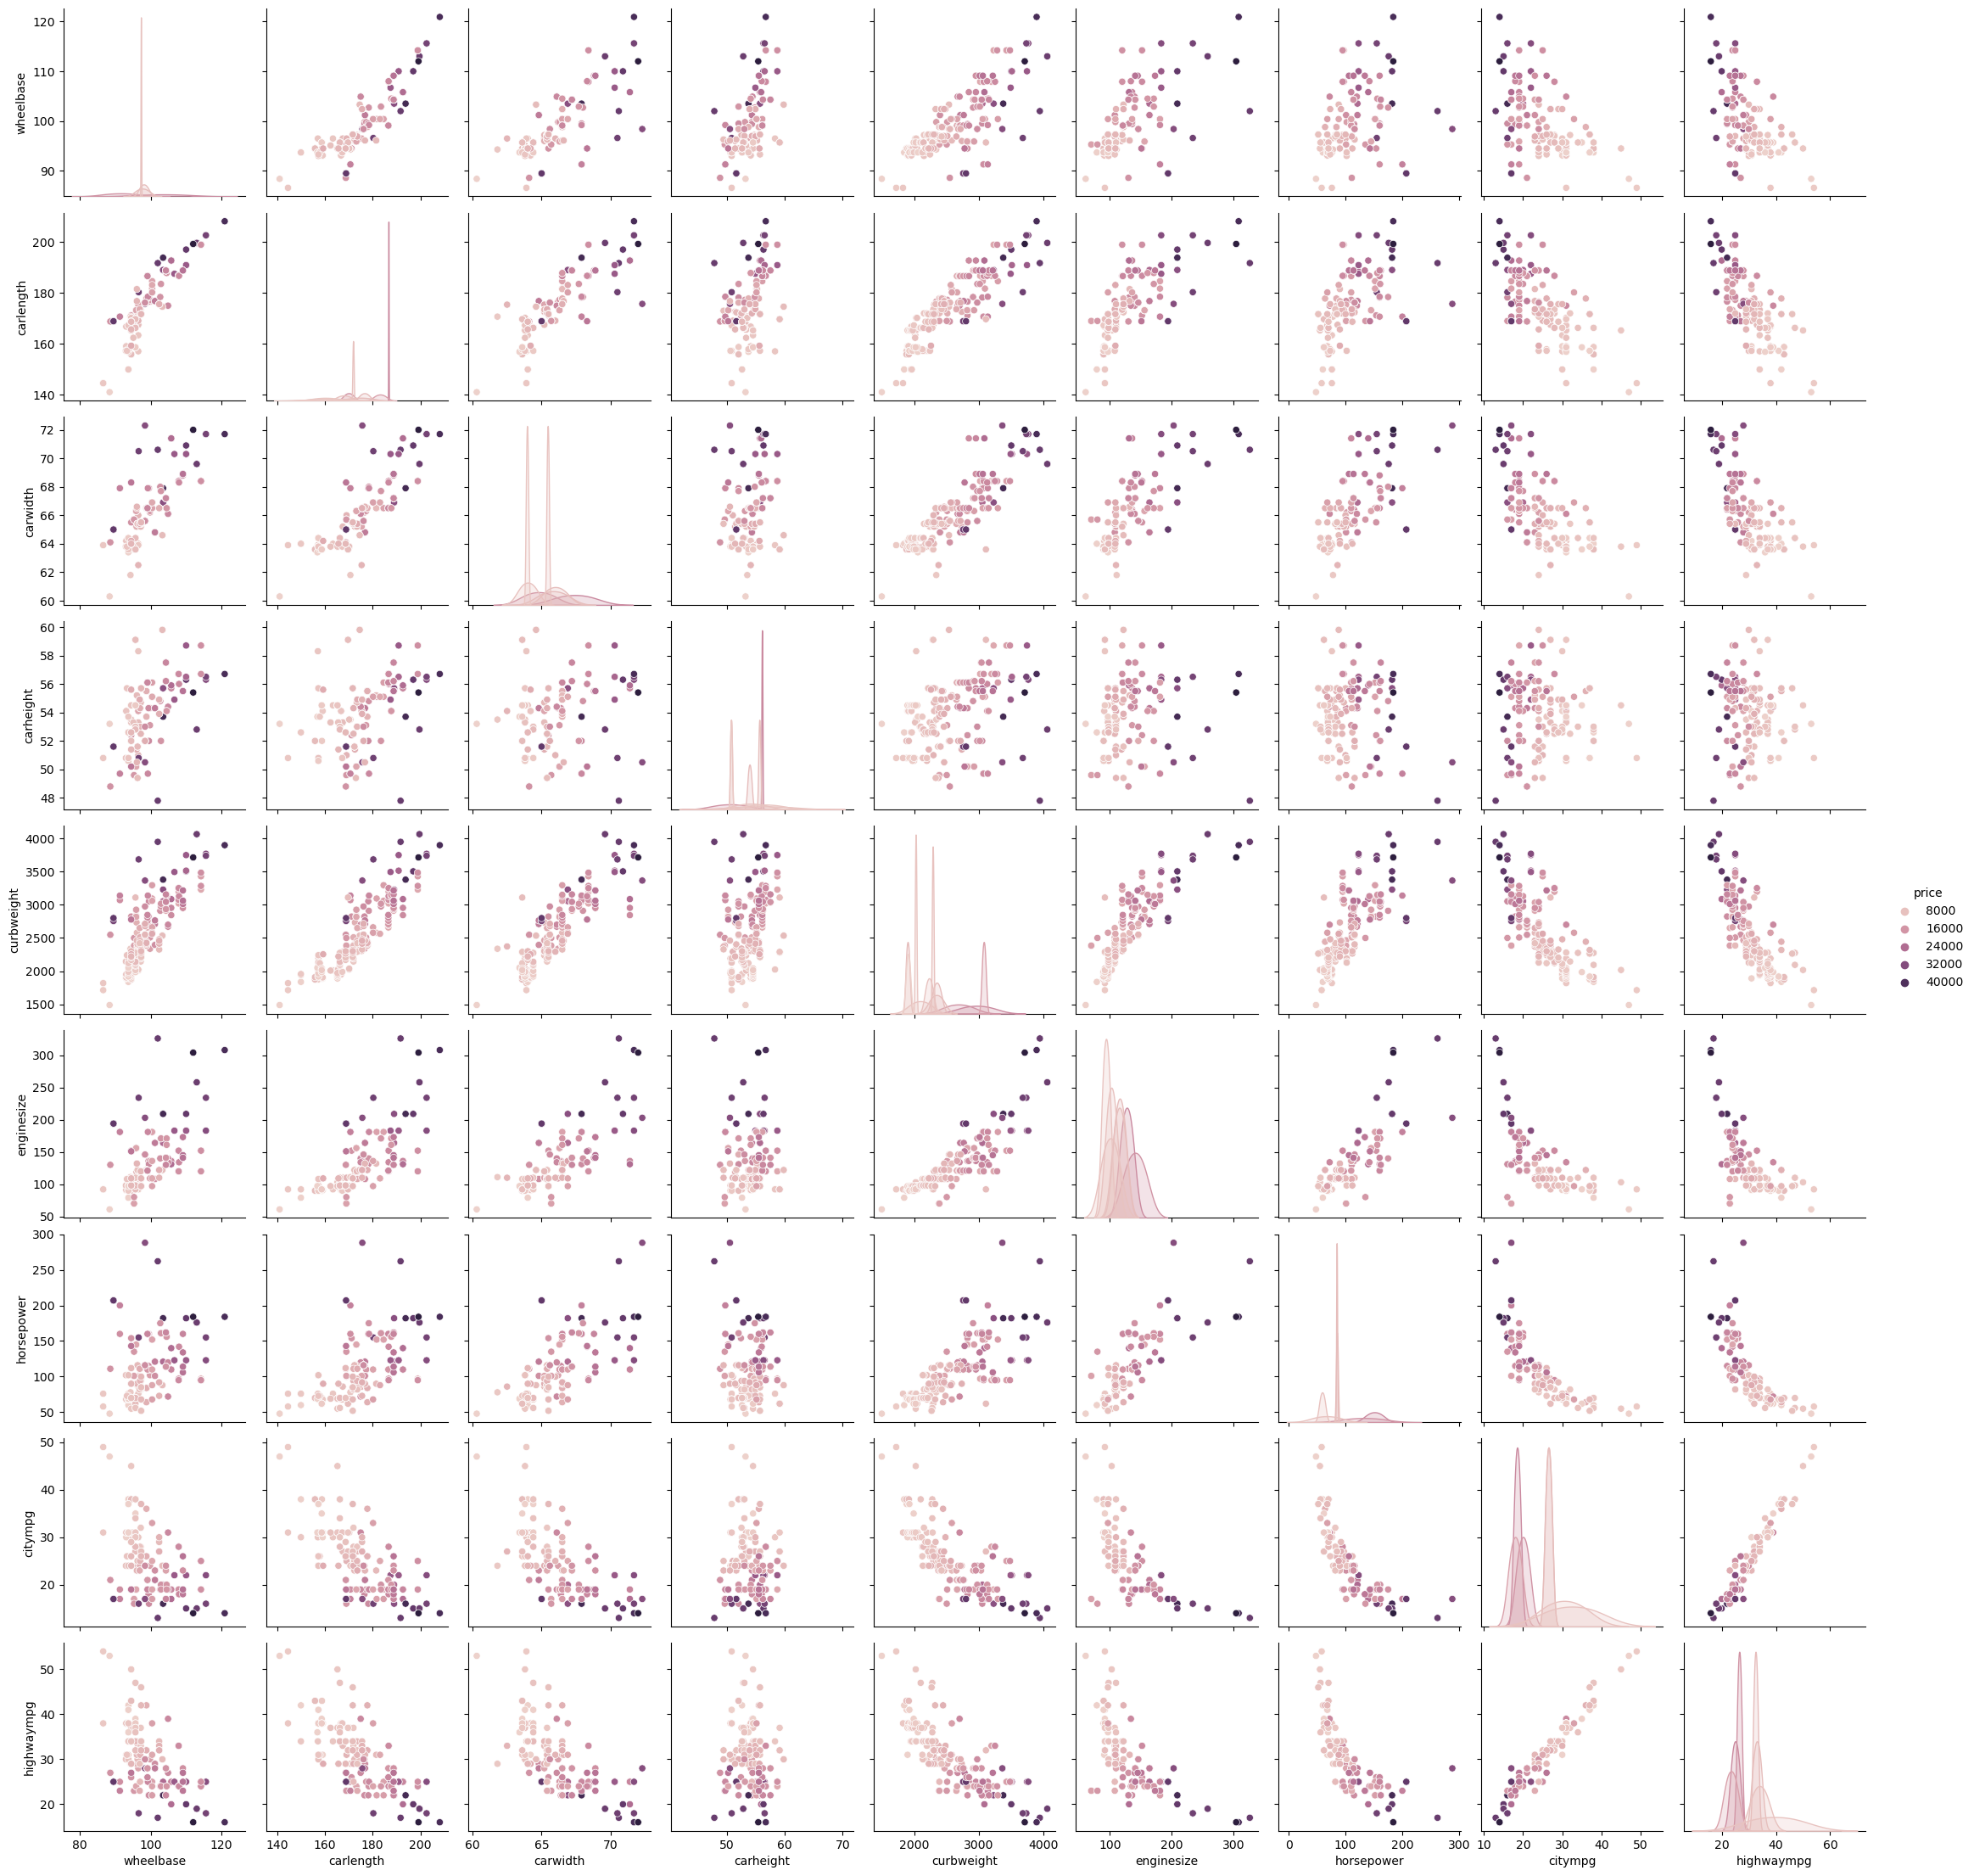

In [3]:
# Pairplot to visualize relationships between numeric features
sns.pairplot(data, vars=["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "horsepower", "citympg", "highwaympg"], hue="price")
plt.show()

# Step 4: Data Preprocessing 

In [4]:
# Remove non-numeric columns aand drop any rows with missing values
data.dropna(inplace=True)
data = data.select_dtypes(include=[np.number])

# Step 5: Feature Selection  

In [5]:
X = data.drop(columns=["price"])
y = data["price"]

# Step 6: Split the data into training and testing sets 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation 

In [7]:
# Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Step 8: Model Evaluation 

In [8]:
# Calculate Mean Squared Error and R-squared for the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [9]:
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R-squared:", r2_gb)

Gradient Boosting - Mean Squared Error: 5339069.827465956
Gradient Boosting - R-squared: 0.9323689144792252


# Step 9: Visualization of Predicted vs. Actual Prices

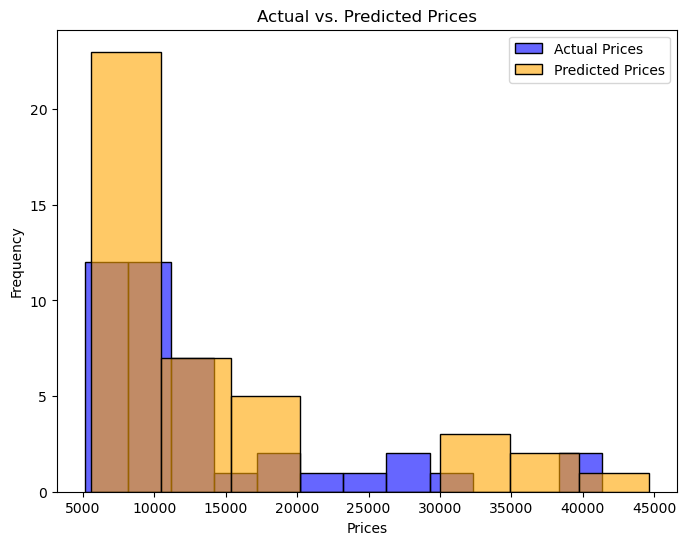

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color='blue', alpha=0.6, label='Actual Prices')
sns.histplot(y_pred_gb, color='orange', alpha=0.6, label='Predicted Prices')
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.show()

In [11]:
# Step 10: Conclusion
print("Conclusion:")
print("The Gradient Boosting model shows promising performance in predicting car prices.")
print("It considers interactions between features and can capture non-linear relationships.")

Conclusion:
The Gradient Boosting model shows promising performance in predicting car prices.
It considers interactions between features and can capture non-linear relationships.
